# Previsão de preços de voos 
Este dataset contém informação sobre voos do website [Easymytrip](https://www.easemytrip.com/). Contém informação sobre viagens entre 6 cidades metropolitanas na Índia recolhidos ao longo de 50 dias iniciando em 11/2/2022.

Colunas do dataset

* **Airline**: O nome da companhia aérea. É uma característica categórica com 6 companhias aéreas diferentes.
* **Flight**: Armazena informação sobre o código de voo do avião. Atributo categórico.
* **Source City**: Cidade de onde o voo parte. Atributo categórico com 6 cidades únicas.
* **Departure Time**: Cintém informação sobre o horário de partida. Atributo categórico com 6 rótulos de tempo únicos.
* **Stops**: Número de paragens entre as cidades de origem e destino. Atributo categórico com 3 valores únicos.
* **Arrival Time**: Contém informação sobre o horário de chegada. Atributo categórico com 6 rótulos de tempo únicos.
* **Destination City**: Cidade destino. Atributo categórica com 6 cidades únicas.
* **Class**: Contém informação sobre a classe do passageiro. Atributo categórico com 2 valores únicos.
* **Duration**: Tempo total necessário para viajar entre cidades em horas. Atributo contínuo.
* **Days Left**: Dias restantes para a viagem. Atributo discreto
* **Price**: Preço do voo. 





A coluna target é o Price e o nosso objetivo é prever os preços dos bilhetes de avião.


[Fonte do dadaset](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data)

# Análise exploratória dos dados


Importação das bibliotecas a usadas

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import time

from sklearn.metrics import r2_score

Carregamento do dataset

In [113]:
'''
Load CSV
'''
df = pd.read_csv('novo3.csv')

Visualização de informação genérica

In [114]:
df.shape

(27234, 12)

É constituído pelas seguintes 12 colunas e acomoda 300153 registos

In [115]:
df.columns


Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [116]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,146419,Indigo,6E-6785,Kolkata,Morning,one,Afternoon,Hyderabad,Economy,7.25,35,17829
1,189101,Vistara,UK-832,Chennai,Early_Morning,one,Evening,Mumbai,Economy,11.42,14,15920
2,177449,Air_India,AI-840,Hyderabad,Night,one,Night,Chennai,Economy,26.75,16,7246
3,87642,AirAsia,I5-1321,Bangalore,Evening,one,Late_Night,Delhi,Economy,7.67,20,2723
4,221471,Vistara,UK-927,Delhi,Morning,one,Night,Hyderabad,Business,11.42,43,46097


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27234 entries, 0 to 27233
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        27234 non-null  int64  
 1   airline           27234 non-null  object 
 2   flight            27234 non-null  object 
 3   source_city       27234 non-null  object 
 4   departure_time    27234 non-null  object 
 5   stops             27234 non-null  object 
 6   arrival_time      27234 non-null  object 
 7   destination_city  27234 non-null  object 
 8   class             27234 non-null  object 
 9   duration          27234 non-null  float64
 10  days_left         27234 non-null  int64  
 11  price             27234 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.5+ MB


Eliminamos a primeira coluna, sem nome, porque continha apenas o número respetivo do registo que é lixo no contexto do problema. 

In [118]:
df=df.drop('Unnamed: 0',axis=1)

In [119]:
df.duplicated().sum()

0

In [120]:
df.describe()

,duration,days_left,price
count,27234.000000,27234.000000,27234.000000
mean,12.198833,26.066241,21084.900712
std,7.181134,13.530476,22816.396409
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4802.000000
50%,11.170000,26.000000,7426.000000
75%,16.080000,38.000000,43376.000000
max,45.830000,49.000000,102648.000000


In [121]:
df.nunique()

airline                6
flight              1367
source_city            6
departure_time         6
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             418
days_left             49
price               5058
dtype: int64

In [122]:
#df=df.drop(columns=['flight'])

Não existem valores nulos

In [123]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<Axes: >

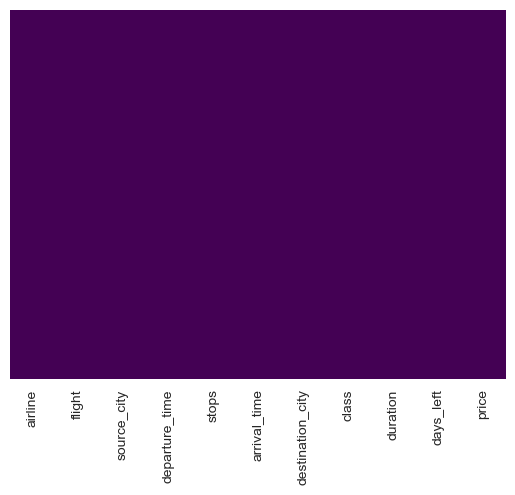

In [124]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

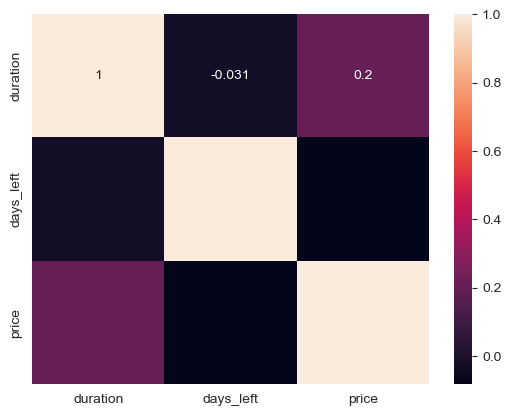

In [125]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

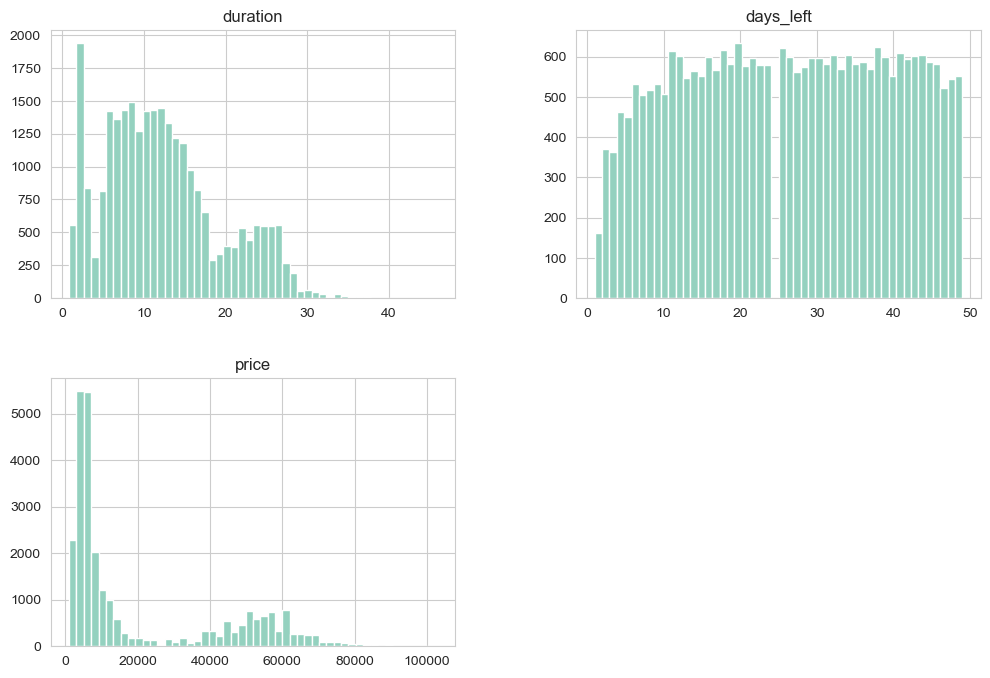

In [126]:
df.hist(bins=50, figsize=(12,8))
plt.show()

In [127]:
df.describe(include=['O'])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,27234,27234,27234,27234,27234,27234,27234,27234
unique,6,1367,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,11683,325,5521,6540,22699,8426,5386,18647


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27234 entries, 0 to 27233
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           27234 non-null  object 
 1   flight            27234 non-null  object 
 2   source_city       27234 non-null  object 
 3   departure_time    27234 non-null  object 
 4   stops             27234 non-null  object 
 5   arrival_time      27234 non-null  object 
 6   destination_city  27234 non-null  object 
 7   class             27234 non-null  object 
 8   duration          27234 non-null  float64
 9   days_left         27234 non-null  int64  
 10  price             27234 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB


In [129]:
cols = ['airline', 'source_city', 'departure_time',
        'stops', 'arrival_time', 'destination_city', 'class']

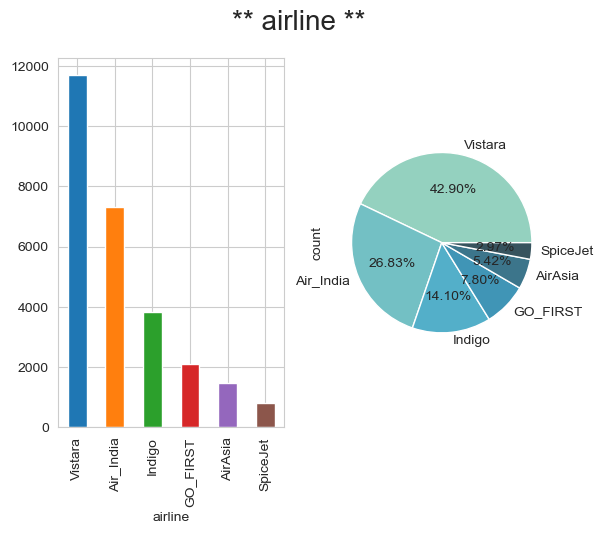

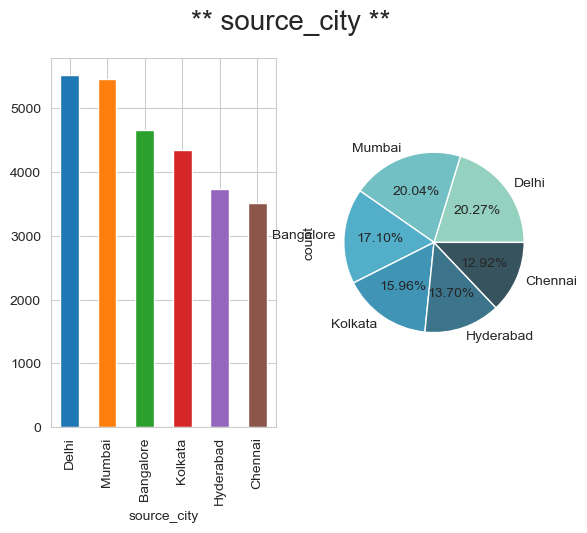

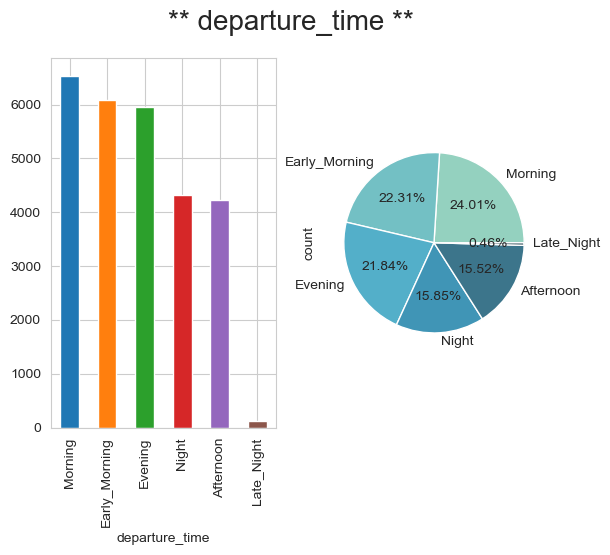

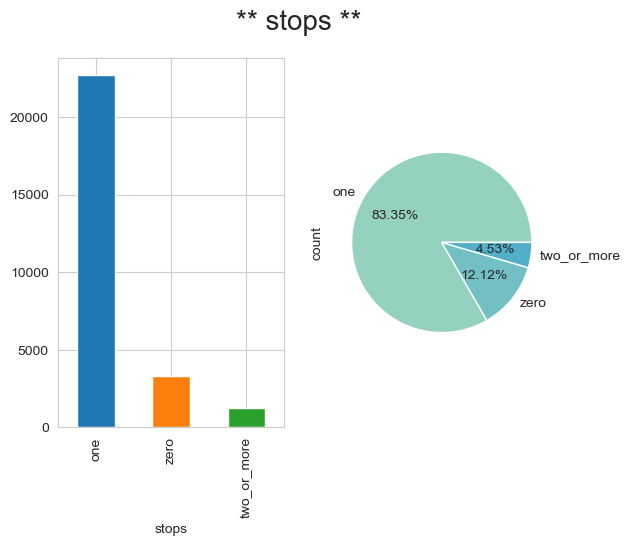

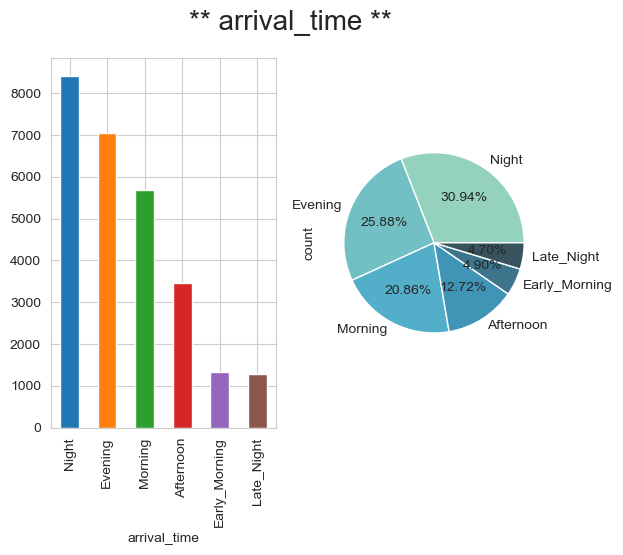

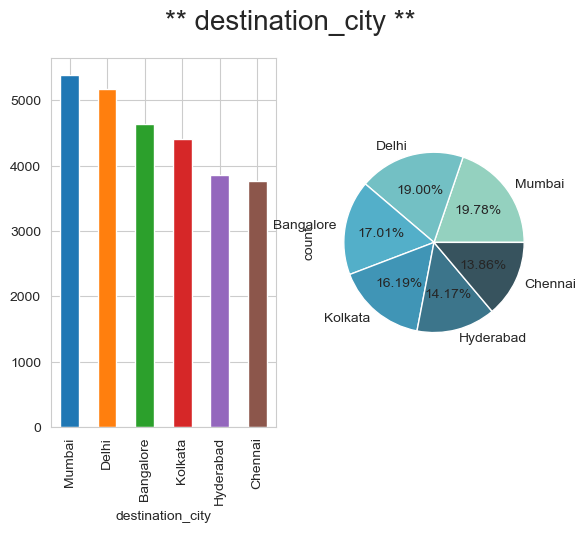

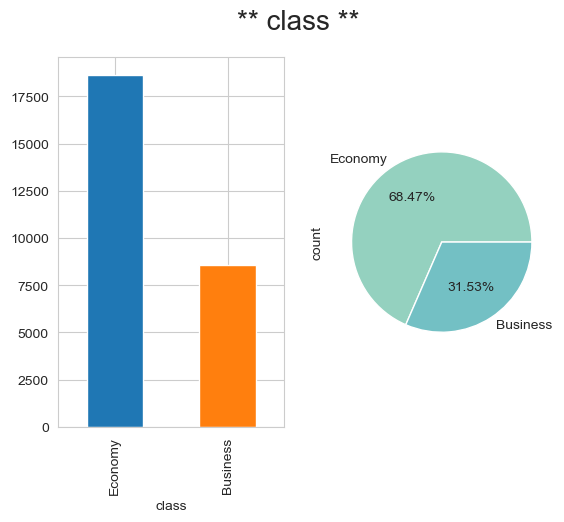

In [130]:
for i in cols:
        fig, ax = plt.subplots(1, 2)
        fig.suptitle('** ' + i + ' **', fontsize=20)
        #plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
        plt.show()

In [131]:
print(df['class'].value_counts())

class
Economy     18647
Business     8587
Name: count, dtype: int64


In [132]:
df['duration'].describe()

count    27234.000000
mean        12.198833
std          7.181134
min          0.830000
25%          6.830000
50%         11.170000
75%         16.080000
max         45.830000
Name: duration, dtype: float64

In [133]:
num_columns = ['duration', 'days_left']

cat_columns = ['airline', 'source_city', 'departure_time', 'stops',
               'arrival_time', 'destination_city', 'class']

target = 'price'

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

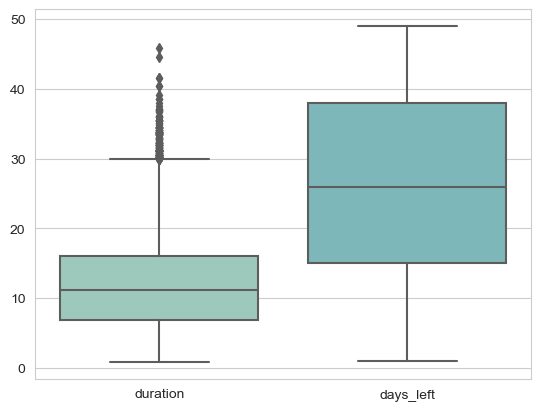

In [134]:
sns.boxplot(data=df[num_columns])

Apesar de de alguns valores serem considerados outliers não devem ser descartados. São valores dentro do nosso domíni, os dados são foram recolhidos durante o período de 50 dias.

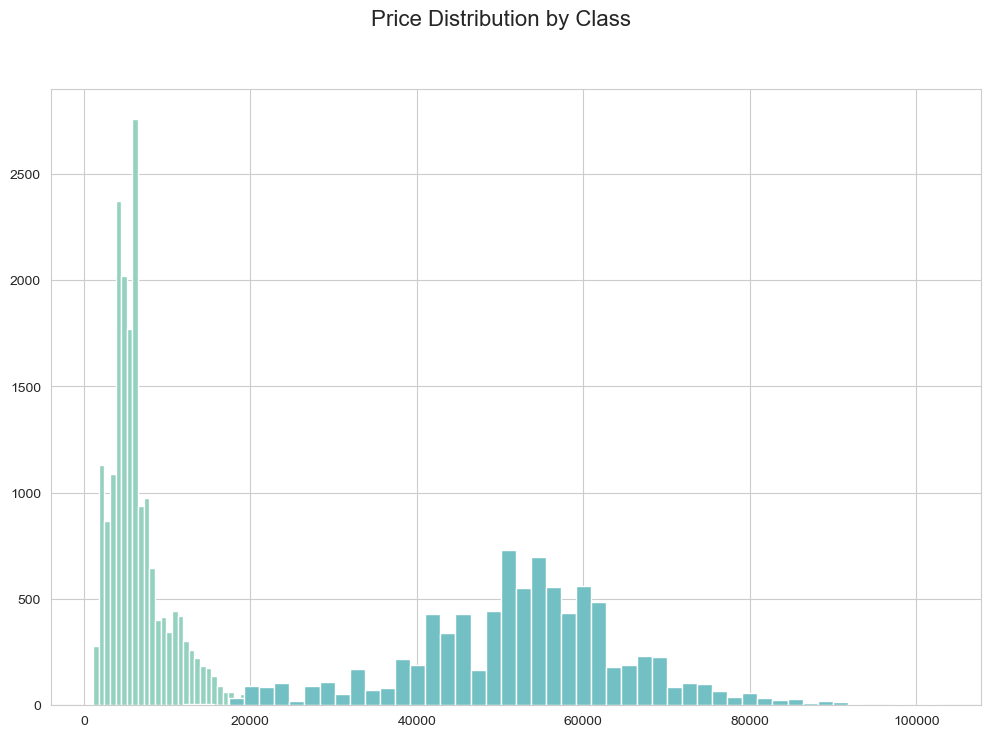

In [135]:
buss = df.drop(df[(df['class'] == 'Business')].index)
eco  = df.drop(df[(df['class'] == 'Economy')].index)
buss['price'].hist(bins=50, figsize=(12,8))
eco ['price'].hist(bins=50, figsize=(12,8))
plt.suptitle('Price Distribution by Class', fontsize=16)
plt.show()

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

Text(0.5, 1.0, 'Airline prices based on the class and company')

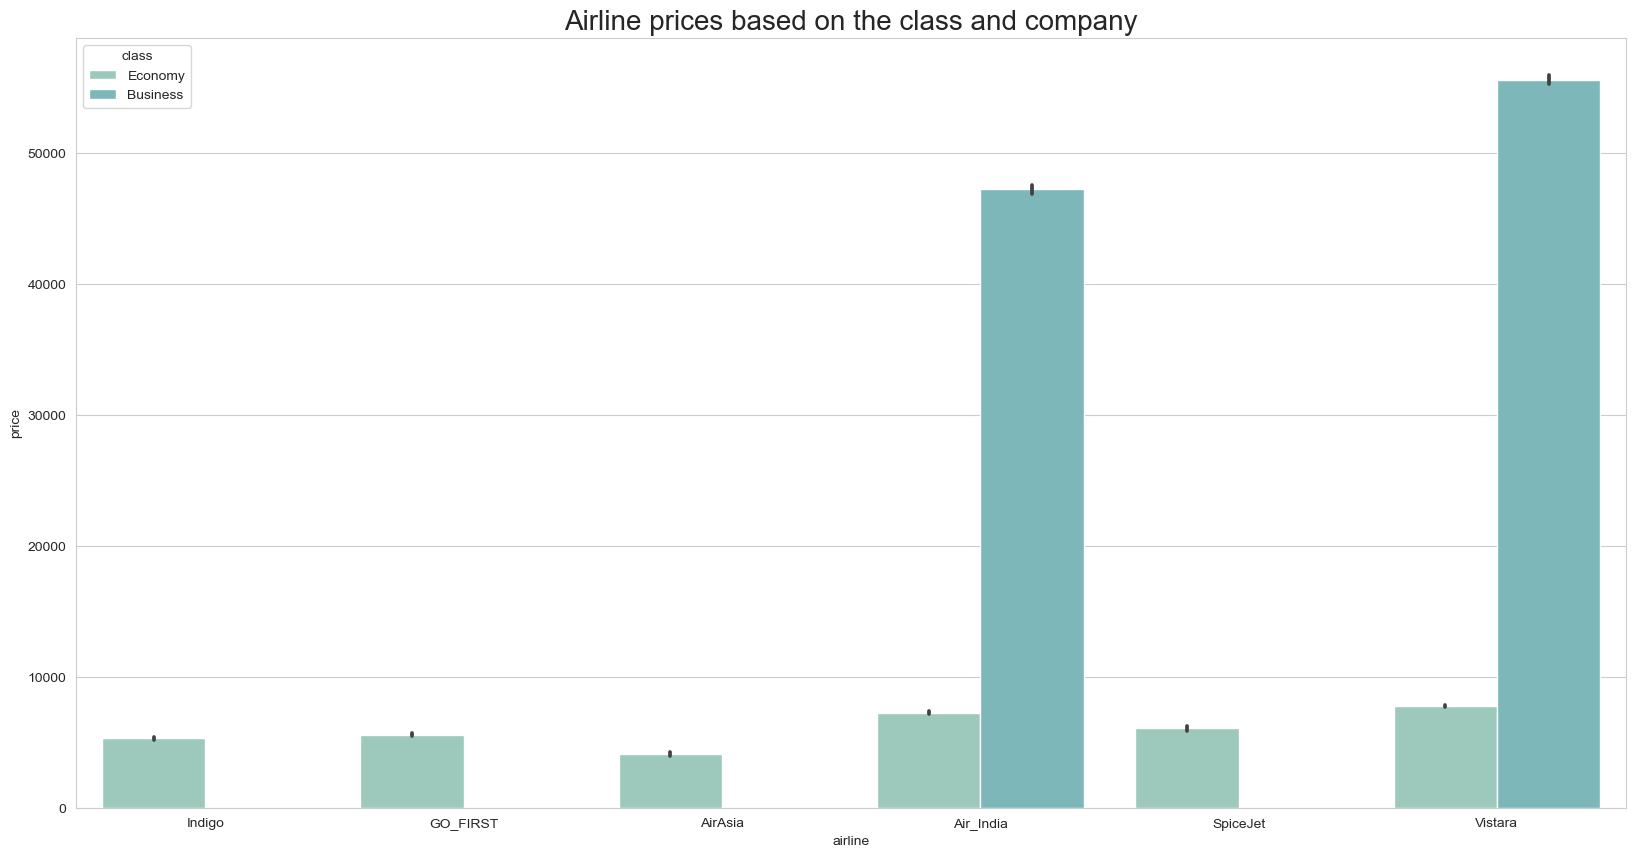

In [136]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


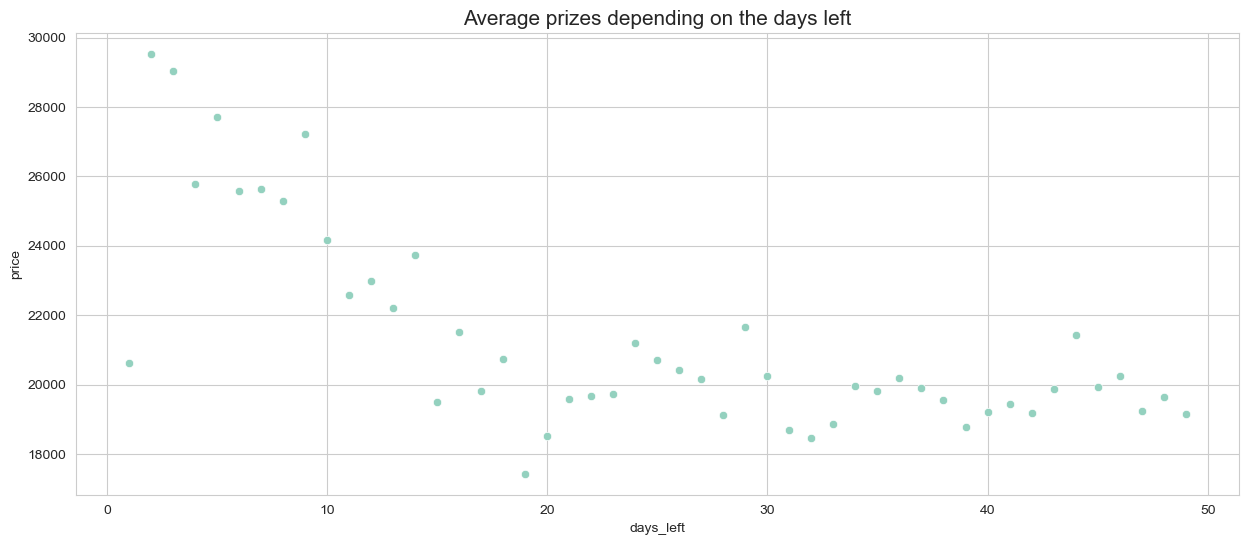

In [137]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


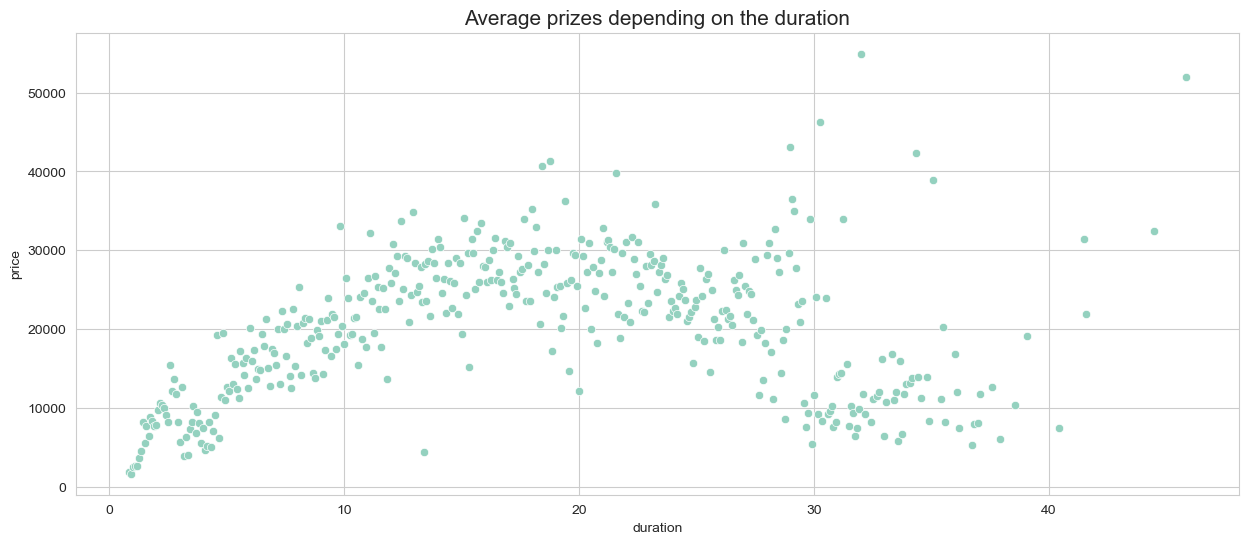

In [138]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

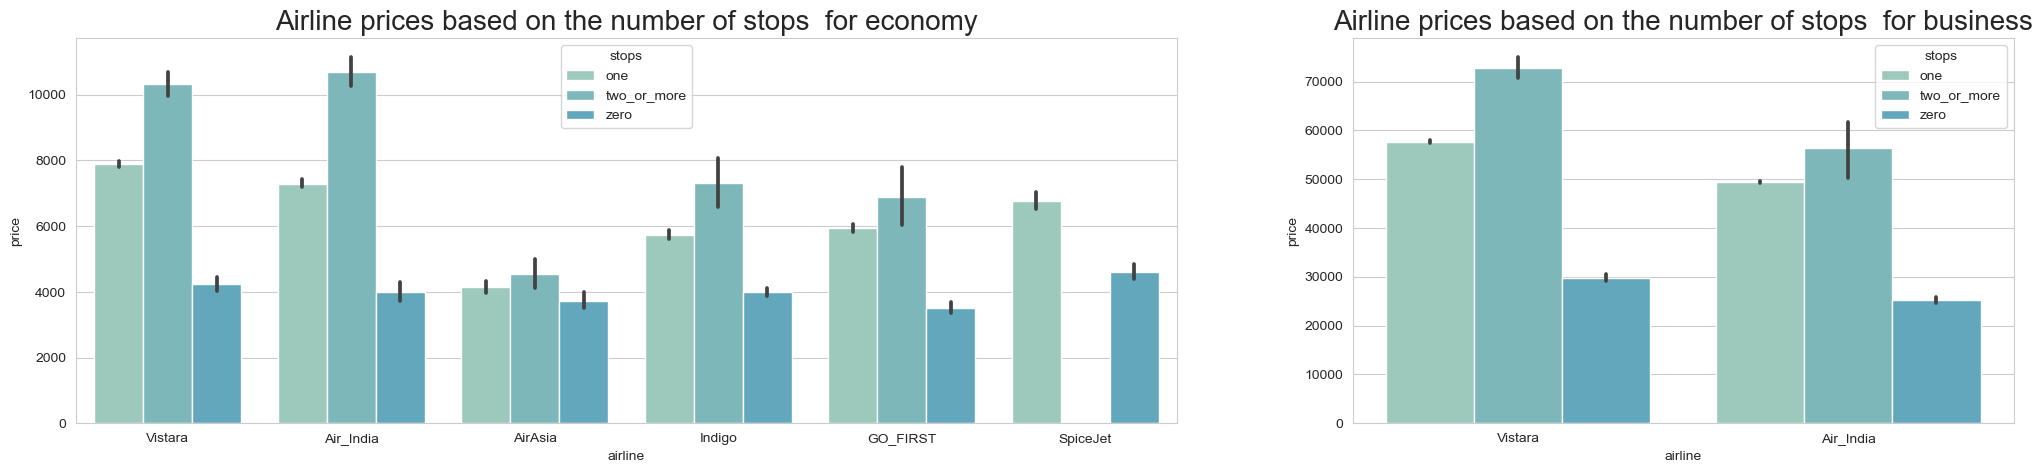

In [139]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

In [140]:
df_r1 = df.copy()

In [141]:
for col in cat_columns:
    df_r1[col] = pd.factorize(df_r1[col])[0]+1

df_r1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,6E-6785,1,1,1,1,1,1,7.25,35,17829
1,2,UK-832,2,2,1,2,2,1,11.42,14,15920
2,3,AI-840,3,3,1,3,3,1,26.75,16,7246
3,4,I5-1321,4,4,1,4,4,1,7.67,20,2723
4,2,UK-927,5,1,1,3,1,2,11.42,43,46097


In [142]:
df_r1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27234 entries, 0 to 27233
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           27234 non-null  int64  
 1   flight            27234 non-null  object 
 2   source_city       27234 non-null  int64  
 3   departure_time    27234 non-null  int64  
 4   stops             27234 non-null  int64  
 5   arrival_time      27234 non-null  int64  
 6   destination_city  27234 non-null  int64  
 7   class             27234 non-null  int64  
 8   duration          27234 non-null  float64
 9   days_left         27234 non-null  int64  
 10  price             27234 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.3+ MB


In [143]:
df_r1.nunique()

airline                6
flight              1367
source_city            6
departure_time         6
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             418
days_left             49
price               5058
dtype: int64

<Axes: >

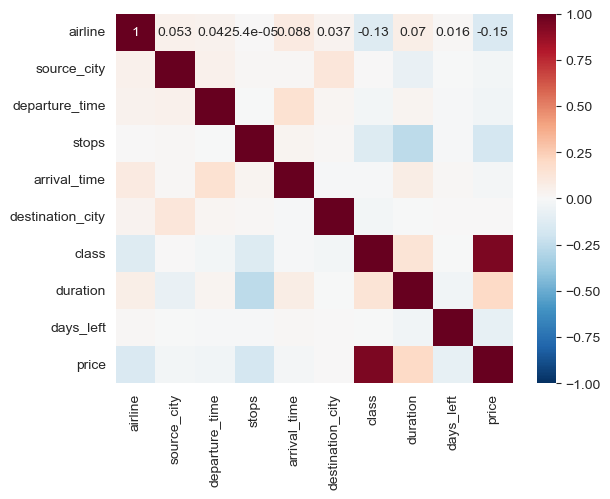

In [144]:

sns.heatmap(df_r1.corr(numeric_only=True), annot=True, vmin= -1.0, vmax= 1.0, center = 0,cmap = 'RdBu_r')

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

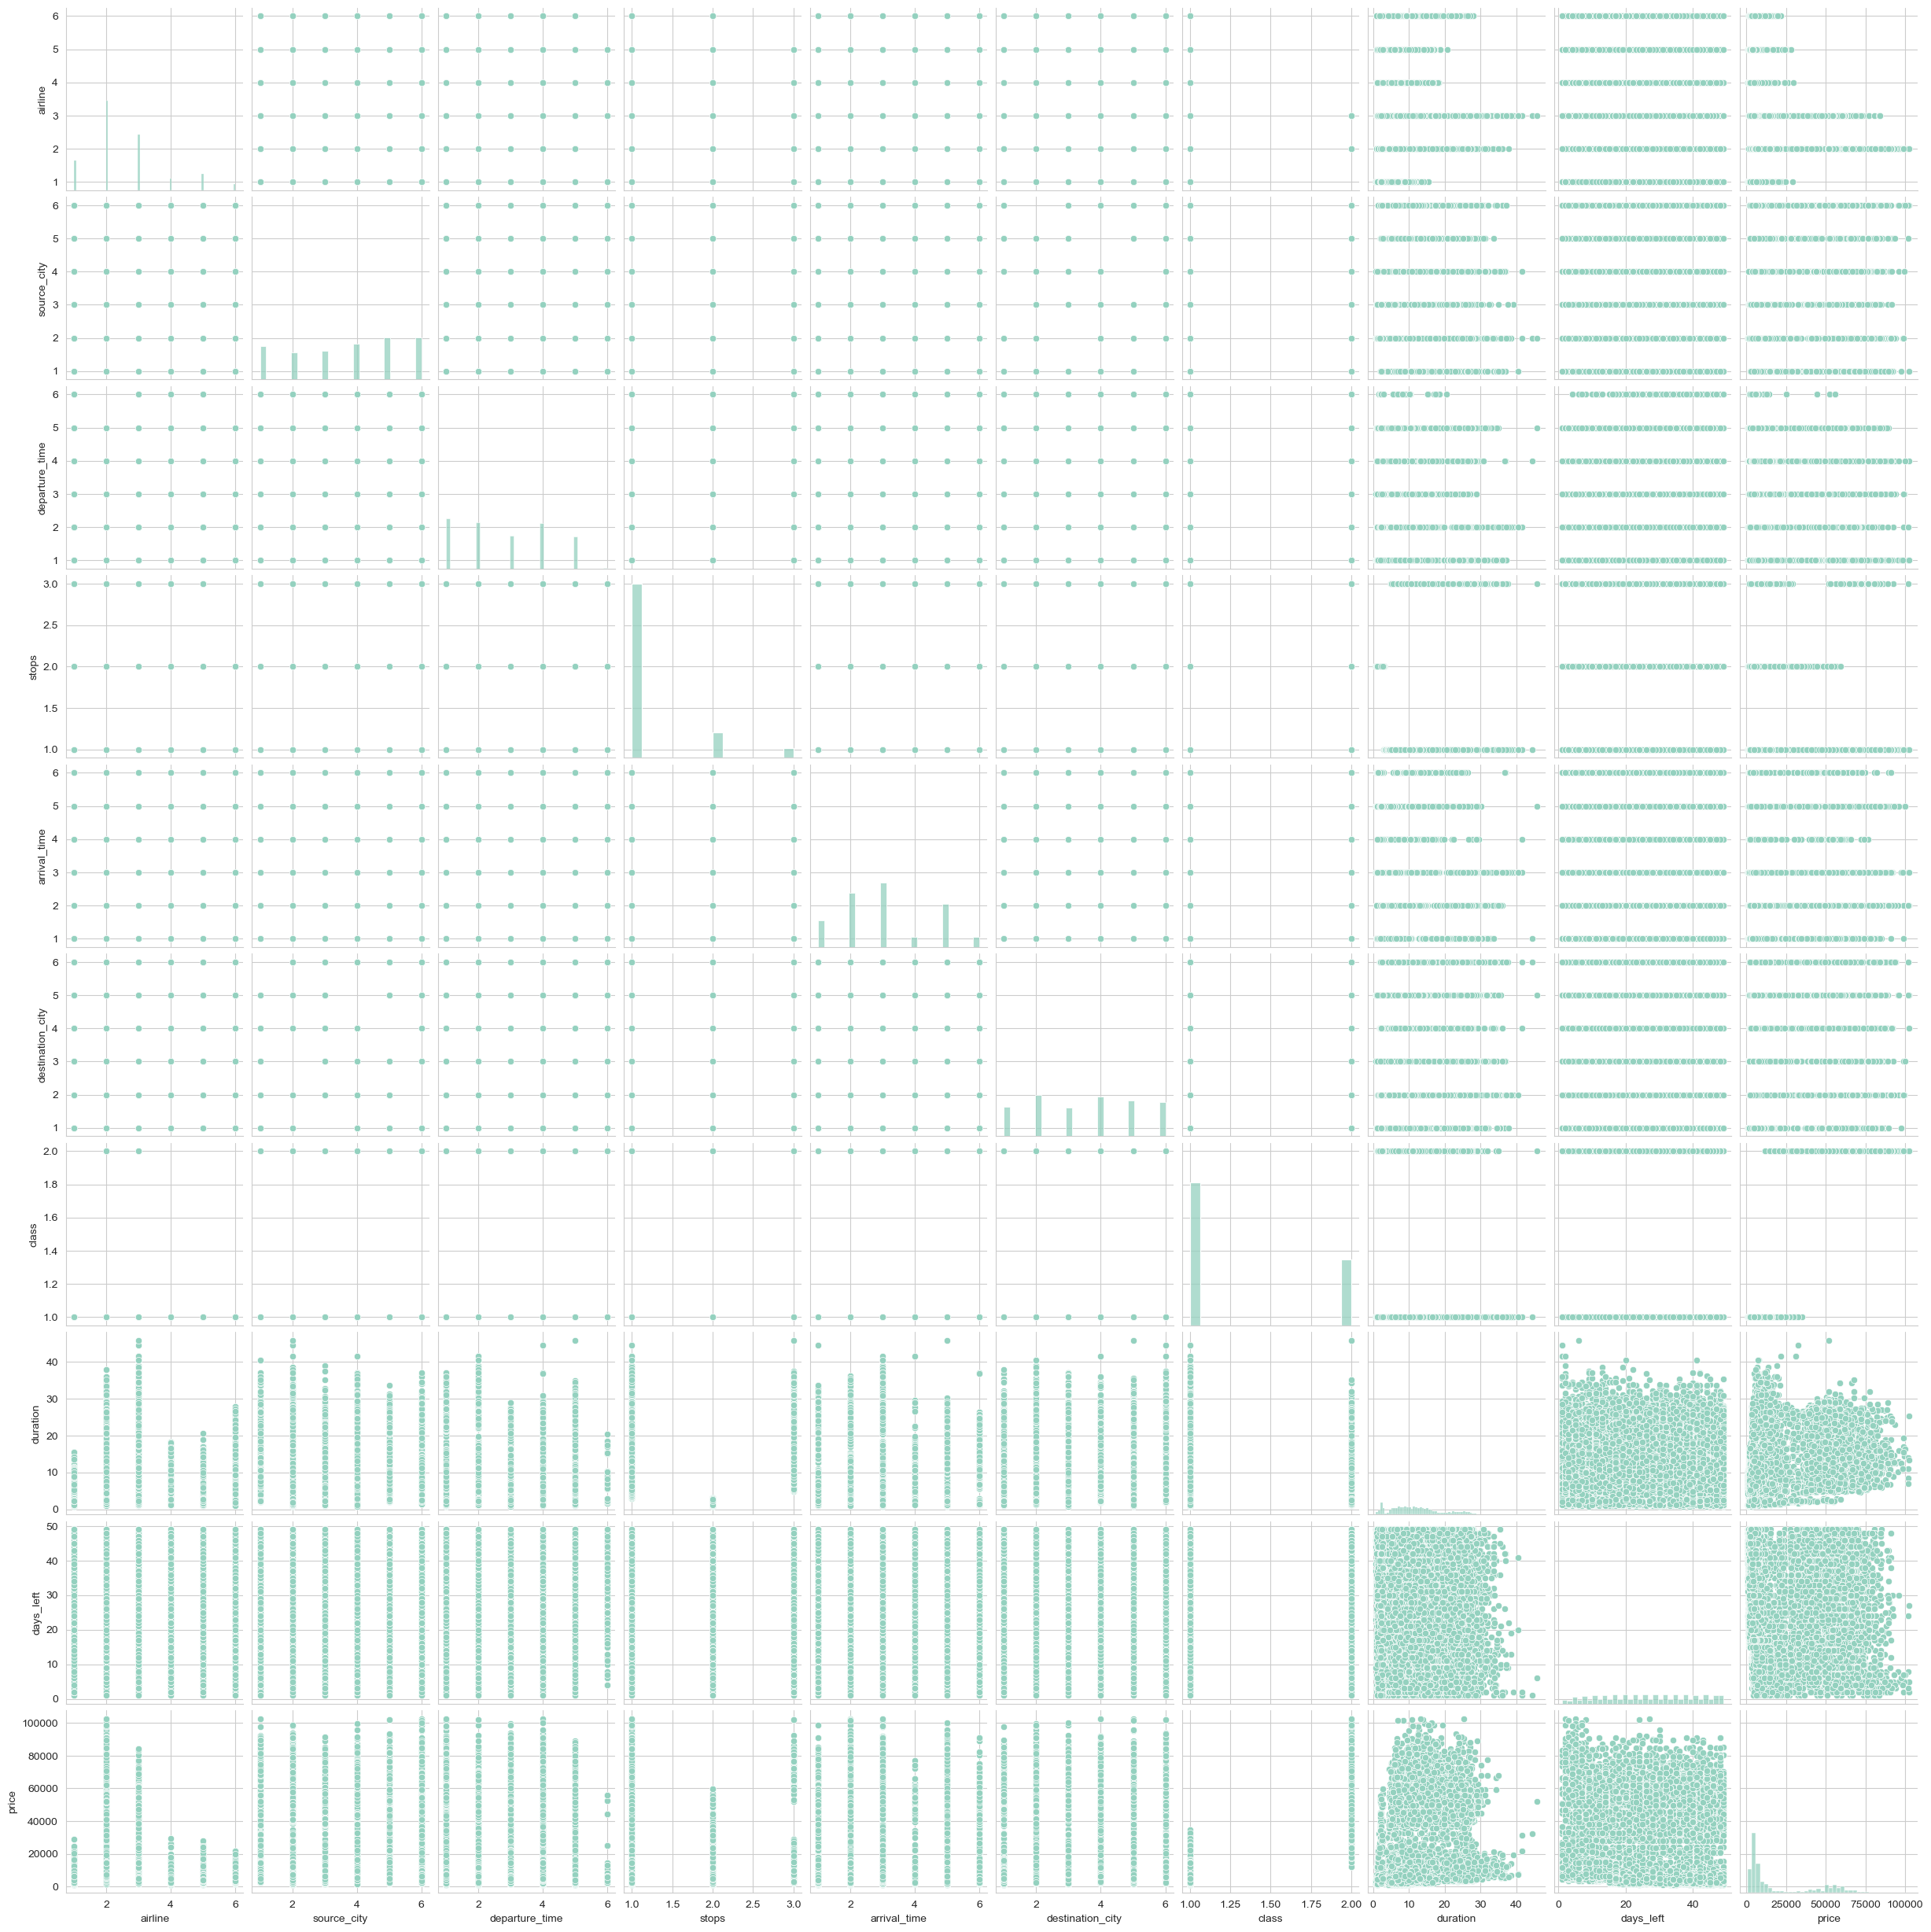

In [145]:
sns.pairplot(df_r1)

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

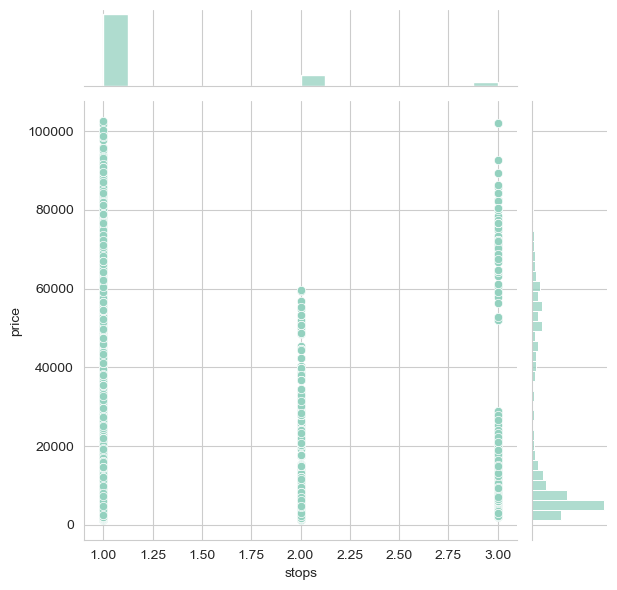

In [146]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

sns.jointplot(x='stops', y='price', data=df_r1)

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

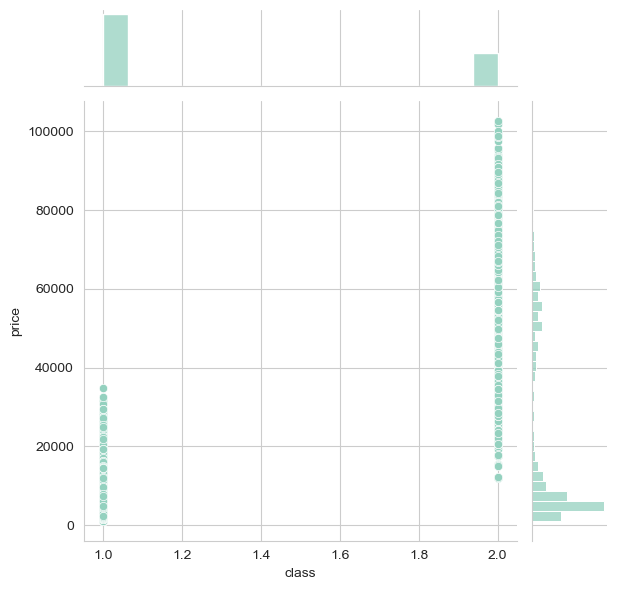

In [147]:
sns.jointplot(x='class', y='price', data=df_r1)

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

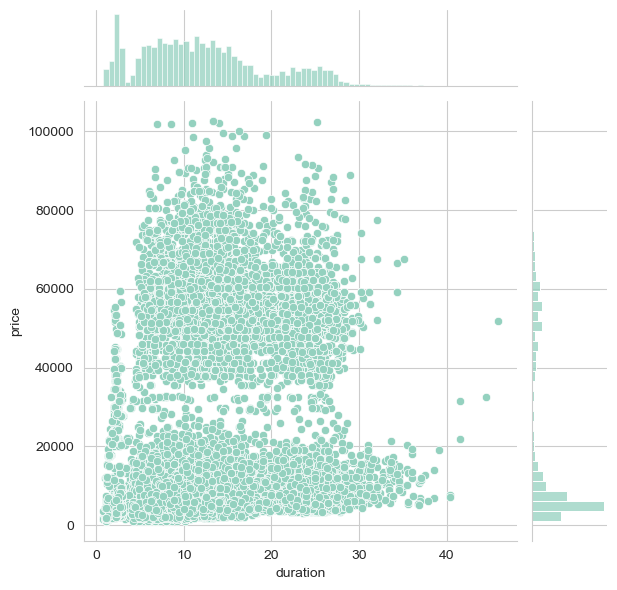

In [148]:
sns.jointplot(x='duration', y='price', data=df_r1)

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

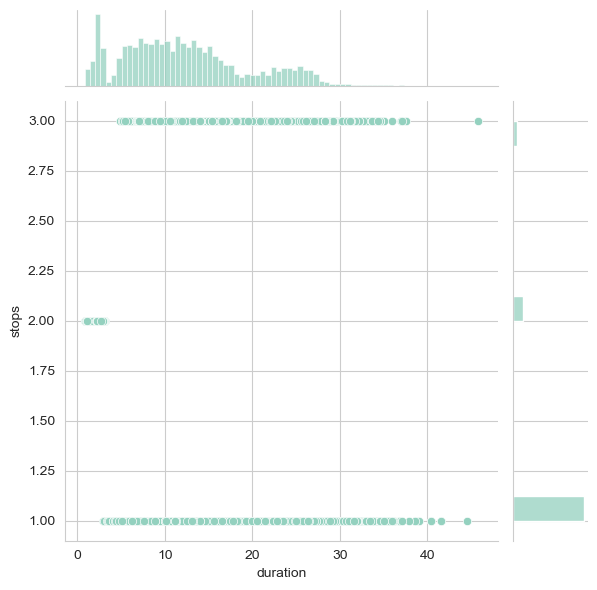

In [149]:
sns.jointplot(x='duration', y='stops', data=df_r1)

## Modelos de Machine Learning

In [150]:
df_r2 = df_r1.copy()
#df_r2 = df_r1.head(5000)
df_r2 = df_r2.drop(["flight"],axis=1)
#df_r2 = df_r2.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
#df_r2=df_r2.drop(columns=['flight'])

df_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27234 entries, 0 to 27233
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           27234 non-null  int64  
 1   source_city       27234 non-null  int64  
 2   departure_time    27234 non-null  int64  
 3   stops             27234 non-null  int64  
 4   arrival_time      27234 non-null  int64  
 5   destination_city  27234 non-null  int64  
 6   class             27234 non-null  int64  
 7   duration          27234 non-null  float64
 8   days_left         27234 non-null  int64  
 9   price             27234 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.1 MB


In [151]:
X = df_r2.drop(['price'],axis=1)
y = df_r2['price']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

### Decision Tree Regressor

In [153]:
clf = DecisionTreeRegressor(random_state=2021)

clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2021)

In [154]:
predictions = clf.predict(X_test)
predictions

array([ 6764.,  6510.,  7352., ..., 38099.,  6093., 10058.])

In [155]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions, squared=True))
print('RMSE:', mean_squared_error(y_test, predictions, squared=False))

from sklearn.metrics import r2_score


r2 = r2_score(y_test, predictions)
print(f"Coeficiente de Determinação R²: {r2:.2f}")

MAE: 2082.533191364371
MSE: 22421739.55342194
RMSE: 4735.159929022666
Coeficiente de Determinação R²: 0.96


### Linear Regression

In [156]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [157]:
print(lm.intercept_)

-33088.528983336255


In [159]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
airline,-671.624052
source_city,-296.606005
departure_time,-229.908424
stops,-1761.557913
arrival_time,-157.558218
destination_city,402.629447
class,45183.074186
duration,216.602081
days_left,-122.346624


In [160]:
predictions = lm.predict(X_test)

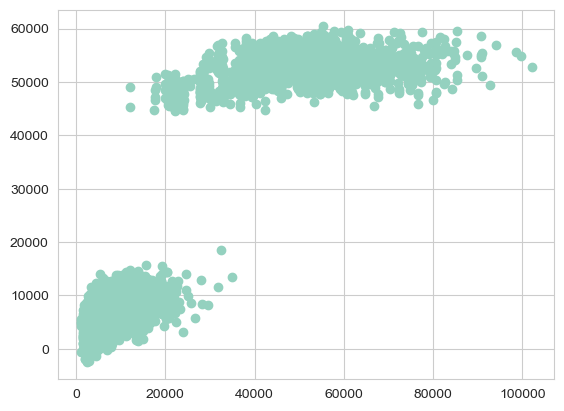

In [161]:
plt.scatter(y_test, predictions)

/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/telmomaciel9/miniconda3/envs/DAA/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


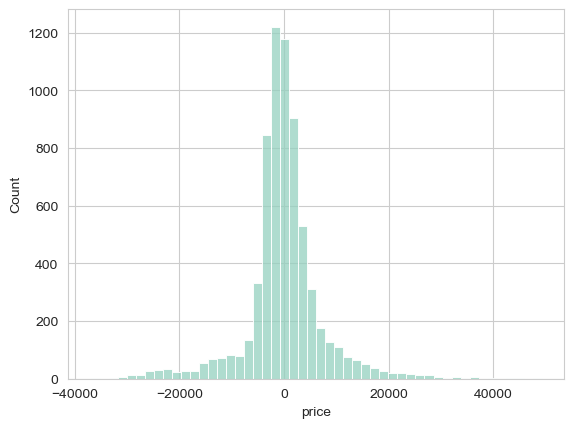

In [162]:
sns.histplot((y_test-predictions),bins=50);

In [163]:
r2 = r2_score(y_test, predictions)
print(f"Coeficiente de Determinação R²: {r2:.2f}")

Coeficiente de Determinação R²: 0.89


In [164]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4690.970216084866
MSE: 55332634.67581508
RMSE: 7438.590906604226


### Random Forest Regressor

In [165]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [166]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [167]:
predictions = rf_regressor.predict(X_test)

In [169]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}")
print(f"Coeficiente de Determinação R²: {r2:.2f}")

MSE: 12601975.39
Coeficiente de Determinação R²: 0.98
